## Traine : AbdalRhman Gameel Ahmed Hebishy (G5)

## KMEAN TAsk 

In [1]:
# imports :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data :

data=pd.read_csv("Mall_Customers - Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# data is cleaned :
data.isna().mean()

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [9]:
# check duplicated data:
# Removing duplicates
data.drop_duplicates(inplace=True)


In [18]:
# convert Categorical Data into Numerical 
data = pd.get_dummies(data, columns=['Gender'])
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender_Female,Gender_Male
0,1,19,15,39,2,False,True
1,2,21,15,81,2,False,True
2,3,20,16,6,3,True,False
3,4,23,16,77,2,True,False
4,5,31,17,40,2,True,False
...,...,...,...,...,...,...,...
195,196,35,120,79,1,True,False
196,197,45,126,28,4,True,False
197,198,32,126,74,1,False,True
198,199,32,137,18,4,False,True


In [19]:
# Scale of the Data :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

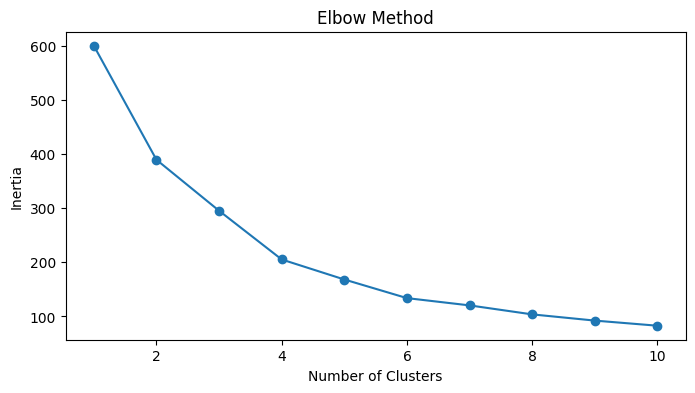

In [20]:
# Elbow method :
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
# Bulding model :
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
data['Cluster'] = clusters

In [22]:
# Grouping data by cluster and calculating mean values
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary['Spending Score (1-100)'])

# Identify the cluster with the highest average spending score
highest_spending_cluster = cluster_summary['Spending Score (1-100)'].idxmax()

Cluster
0    48.851064
1    81.525000
2    62.240741
3    18.350000
4    19.358974
Name: Spending Score (1-100), dtype: float64


In [23]:
# Filtering the customers belonging to the highest spending cluster
customers_highest_spending = data[data['Cluster'] == highest_spending_cluster]
print(customers_highest_spending['CustomerID'])

# Count the number of customers in this group
number_of_customers = customers_highest_spending['CustomerID'].count()
print("Number of customers in the highest spending cluster:", number_of_customers)

122    123
123    124
125    126
127    128
129    130
131    132
133    134
135    136
137    138
139    140
141    142
143    144
145    146
147    148
149    150
151    152
153    154
155    156
157    158
159    160
161    162
163    164
165    166
167    168
169    170
171    172
173    174
175    176
177    178
179    180
181    182
183    184
185    186
187    188
189    190
191    192
193    194
195    196
197    198
199    200
Name: CustomerID, dtype: int64
Number of customers in the highest spending cluster: 40
